## Introduction to Machine Learning - Final Project

Our goal - correctly predicting the label of a future touristic orders as likely to be canceled or likely to not be
canceled, based on an existing data set of nearly 90,000 labeled past orders, containing 34 different features.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from collections import Counter
from sklearn.decomposition import PCA
from collections import defaultdict
from sklearn.neighbors import KNeighborsRegressor
import sklearn
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from numpy import interp
from sklearn.neural_network import MLPClassifier
plt.rcParams['figure.figsize'] = [13, 8]

In [60]:
df = pd.read_csv("feature_data.csv")
dfy = pd.read_csv("label_data.csv")["cancelation"]
df_test = pd.read_csv("feature_data_test.csv")
len_data = len(df)
len_test = len(df_test)
df_combine = pd.concat([df, df_test])
df_combine.drop('Unnamed: 0', axis='columns', inplace=True)


C:\Users\user\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


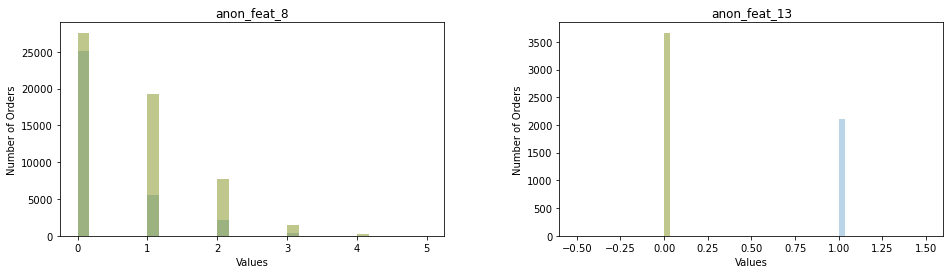

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.3)
               
def plot_features (feature, i, j):
    feature_name = feature
    xs = df[feature_name].values
    xs_1 = xs[dfy.values]
    xs_2 = xs[~dfy.values]
    axes[i,j].hist(xs_1, label="class 1", alpha=0.3, bins = 30)
    axes[i,j].hist(xs_2, label="class 0", alpha=0.3, bins = 30)
    axes[i,j].hist(xs_2, label="class 0", alpha=0.3, bins = 30)
    axes[i,j].set_title(feature_name)
    axes[i,j].set_xlabel("Values")
    axes[i,j].set_ylabel("Number of Orders")
    

plot_features("anon_feat_8", 0, 0) 
plot_features("anon_feat_13", 0, 1)  

fig.delaxes(axes[1][0])
fig.delaxes(axes[1][1])
plt.savefig("label correlation usefull.png", dpi=600)
plt.show()

Others seem intuitively to be less useful in making general prediction, see two examples below

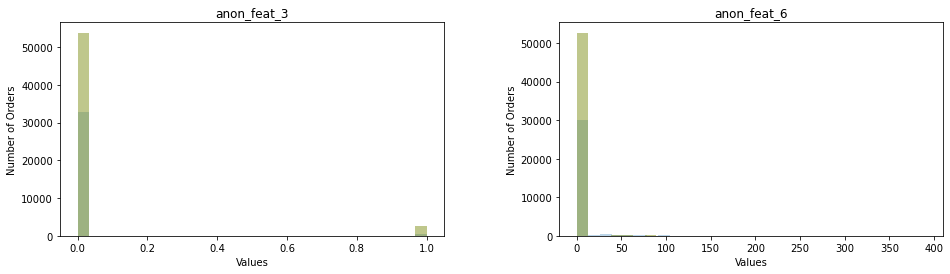

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.3)
               
def plot_features (feature, i, j):
    feature_name = feature
    xs = df[feature_name].values
    xs_1 = xs[dfy.values]
    xs_2 = xs[~dfy.values]
    axes[i,j].hist(xs_1, label="class 1", alpha=0.3, bins = 30)
    axes[i,j].hist(xs_2, label="class 0", alpha=0.3, bins = 30)
    axes[i,j].hist(xs_2, label="class 0", alpha=0.3, bins = 30)
    axes[i,j].set_title(feature_name)
    axes[i,j].set_xlabel("Values")
    axes[i,j].set_ylabel("Number of Orders")
    

plot_features("anon_feat_3", 0, 0)
plot_features("anon_feat_6", 0, 1)


fig.delaxes(axes[1][0])
fig.delaxes(axes[1][1])
plt.savefig("label correlation not usefull.png", dpi=600)
plt.show()

## Exploration

The first step we took was basic analysis of the data set we were given.

We began by creating a heat map to illustrate the correlation between the various features, as correlating features 
might be redundant and can possibly be dropped, in order to reduce dimensionality. High dimensionality (caused by high number of features) is to be avoided as it generates a complex model (high variance - random small change in samples can produce a significant change in the model outcome) and can distort the true relationship between the features (for example can appear as linear after adding dimensions, when in fact it is not).

as demonstrated below, several features (such as "time_until_order" and "anon_feat_11") had a strong correlation with each other.

In [63]:
cor_matrix = df.corr().abs().style.background_gradient(cmap="coolwarm")
cor_matrix

,Unnamed: 0,time_until_order,order_year,order_day_of_month,adults,children,babies,prev_canceled,prev_not_canceled,changes,agent,company,adr,anon_feat_0,anon_feat_1,anon_feat_2,anon_feat_3,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13
Unnamed: 0,1.000000,0.008234,0.299310,0.010057,0.005796,0.023063,0.028345,0.018364,0.000844,0.004441,0.615504,0.208787,0.020074,0.149813,0.205640,0.041075,0.019378,0.157052,0.195246,0.013731,0.133586,0.106112,0.818237,0.011636,0.004953,0.001602,0.255275
time_until_order,0.008234,1.000000,0.039087,0.003031,0.123699,0.039179,0.021315,0.084876,0.074639,0.000295,0.071875,0.156485,0.012048,0.087673,0.165793,0.002684,0.125870,0.104356,0.170992,0.172199,0.115189,0.094990,0.078964,0.487098,0.959980,0.005159,0.291412
order_year,0.299310,0.039087,1.000000,0.001116,0.034312,0.051760,0.012514,0.119836,0.029331,0.030669,0.062462,0.255305,0.024363,0.019992,0.029429,0.065655,0.009743,0.092226,0.035632,0.056072,0.014540,0.108936,0.034409,0.039040,0.050678,0.002689,0.014805
order_day_of_month,0.010057,0.003031,0.001116,1.000000,0.001731,0.015827,0.001337,0.024917,0.001862,0.010334,0.000040,0.050604,0.043146,0.015037,0.028578,0.005779,0.006582,0.015121,0.009192,0.021225,0.006901,0.003584,0.000472,0.010269,0.007953,0.001133,0.008743
adults,0.005796,0.123699,0.034312,0.001731,1.000000,0.032568,0.020909,0.007315,0.111358,0.049944,0.035456,0.199110,0.125008,0.095898,0.091632,0.024537,0.151878,0.216493,0.147987,0.009634,0.019174,0.130470,0.010017,0.124635,0.151967,0.003792,0.053173
children,0.023063,0.039179,0.051760,0.015827,0.032568,1.000000,0.025264,0.024775,0.021466,0.050719,0.042756,0.030002,0.154710,0.047129,0.044691,0.050536,0.033760,0.377861,0.329290,0.033714,0.056907,0.080463,0.046501,0.002811,0.028192,0.001040,0.030702
babies,0.028345,0.021315,0.012514,0.001337,0.020909,0.025264,1.000000,0.007703,0.007084,0.081313,0.037577,0.009572,0.016577,0.017176,0.019489,0.003212,0.009158,0.041805,0.043314,0.010851,0.034375,0.099443,0.043540,0.009081,0.020595,0.007887,0.030580
prev_canceled,0.018364,0.084876,0.119836,0.024917,0.007315,0.024775,0.007703,1.000000,0.147278,0.027251,0.012652,0.187248,0.031825,0.015218,0.015059,0.003083,0.081758,0.049984,0.059345,0.006438,0.018536,0.048199,0.013700,0.033175,0.076986,0.007404,0.108098
prev_not_canceled,0.000844,0.074639,0.029331,0.001862,0.111358,0.021466,0.007084,0.147278,1.000000,0.009769,0.020546,0.212025,0.040119,0.043565,0.049105,0.040490,0.419006,0.021786,0.003749,0.009848,0.042869,0.038668,0.005575,0.078774,0.096237,0.005830,0.067665
changes,0.004441,0.000295,0.030669,0.010334,0.049944,0.050719,0.081313,0.027251,0.009769,1.000000,0.066958,0.129196,0.042877,0.055910,0.098425,0.025598,0.009176,0.045317,0.096657,0.012623,0.063982,0.054734,0.070476,0.005321,0.006169,0.002519,0.141534


As the data set contains several anonymous features, we tried to determine their importance by checking their correlation with the label. Some seemed to provide  useful information as the label likelihood  change significantly for different values, see two examples below

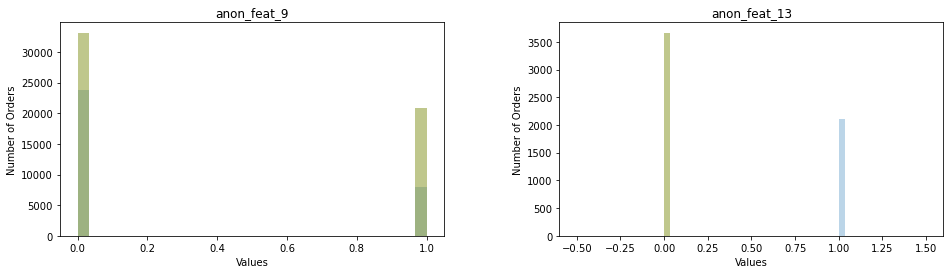

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.3)
               
def plot_features (feature, i, j):
    feature_name = feature
    xs = df[feature_name].values
    xs_1 = xs[dfy.values]
    xs_2 = xs[~dfy.values]
    axes[i,j].hist(xs_1, label="class 1", alpha=0.3, bins = 30)
    axes[i,j].hist(xs_2, label="class 0", alpha=0.3, bins = 30)
    axes[i,j].hist(xs_2, label="class 0", alpha=0.3, bins = 30)
    axes[i,j].set_title(feature_name)
    axes[i,j].set_xlabel("Values")
    axes[i,j].set_ylabel("Number of Orders")
    

plot_features("anon_feat_9", 0, 0) 
plot_features("anon_feat_13", 0, 1)  

fig.delaxes(axes[1][0])
fig.delaxes(axes[1][1])
plt.savefig("label correlation.png", dpi=600)
plt.show()

Others seem intuitively to be less useful in making general prediction due to low variance in label for different features, or because the great majority of orders belonged to values which had an even split between labels, see two examples below

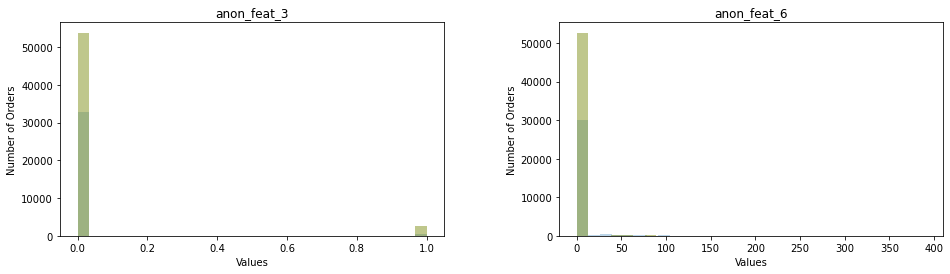

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.3)
               
def plot_features (feature, i, j):
    feature_name = feature
    xs = df[feature_name].values
    xs_1 = xs[dfy.values]
    xs_2 = xs[~dfy.values]
    axes[i,j].hist(xs_1, label="class 1", alpha=0.3, bins = 30)
    axes[i,j].hist(xs_2, label="class 0", alpha=0.3, bins = 30)
    axes[i,j].hist(xs_2, label="class 0", alpha=0.3, bins = 30)
    axes[i,j].set_title(feature_name)
    axes[i,j].set_xlabel("Values")
    axes[i,j].set_ylabel("Number of Orders")
    

plot_features("anon_feat_3", 0, 0)
plot_features("anon_feat_6", 0, 1)


fig.delaxes(axes[1][0])
fig.delaxes(axes[1][1])
plt.savefig("label correlation.png", dpi=600)
plt.show()

We noted that several features had significant outliers values. Below is an example of several of those features
(presented in logaritmic scale in order for the outliers to be viewble).

outliers (extreme values very far from the norm) are very problematic as they distort the models which are forced to consider values which are not at all represantative of the database, and probably result from erorrs or extremly rare samples. The models generated without handeling outliers will be distorted, and the differnces between the regular samples (which will be small in comparison to the outlier) will be treated as insignificant naunces, and not given the proper importnace. As outliers are likely to result from errors, and are therefore indicative of a bad sample, it is best to delete them completely from the database (rather than assigning them with some other value).



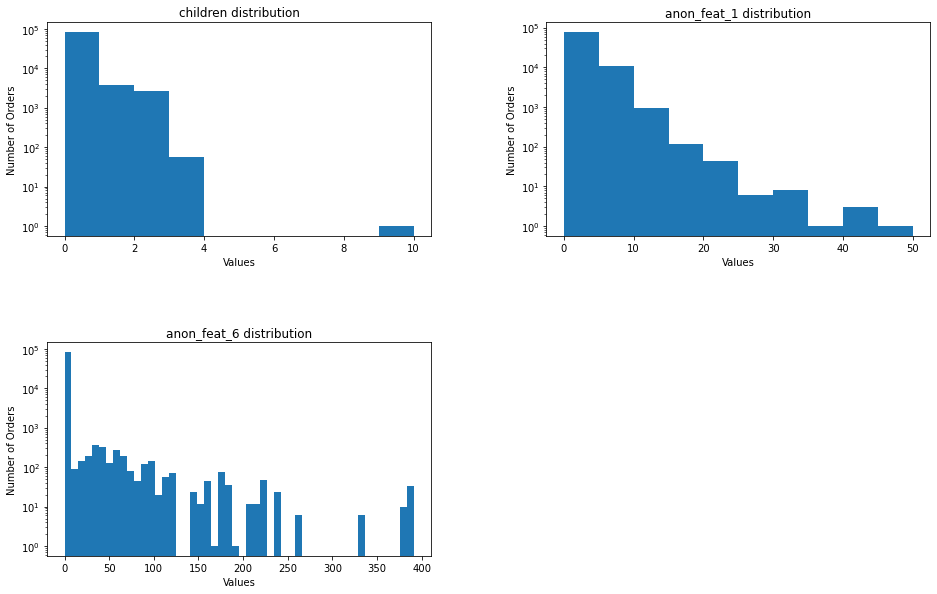

In [66]:
#Features with noted outliers
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.3)

axes[0,0].hist(df['children'][df["children"].notnull()].values, log = True)
axes[0,0].set_title("children distribution")
axes[0,0].set_xlabel("Values")
axes[0,0].set_ylabel("Number of Orders")

axes[0,1].hist(df['anon_feat_1'][df["anon_feat_1"].notnull()].values, log = True)
axes[0,1].set_title("anon_feat_1 distribution")
axes[0,1].set_xlabel("Values")
axes[0,1].set_ylabel("Number of Orders")

axes[1,0].hist(df['anon_feat_6'][df["anon_feat_6"].notnull()].values, bins = 50, log = True)
axes[1,0].set_title("anon_feat_6 distribution")
axes[1,0].set_xlabel("Values")
axes[1,0].set_ylabel("Number of Orders")

fig.delaxes(axes[1][1])
plt.savefig("outliers.png", dpi=600)
plt.show()

We noted that many features were categorical in nature. Other than obviously the string features, many features which were defined as int, or even as float, displayed a categorical behaviour - i.e. had a very small number of possible values assigned to them. Below is an illustration of several of the features which displayed such behaviour.

We believed that while the exact numerical value of such features might bear some importance, greater emphasis should be placed on the distinction between values itself. We therefore decided to treat such features as catagorical features (we chose 10 as the number of distinct values to serve as the threshold for an int of float feature to be handled as catagorical).

All catagorical features (string or otherwise) were converted into dummy variables. This method was chosed as simply assigning each catagorical feature a numeric value is problematic as the model might detuct that the exact values (which will be random in case of strings) are important, such as deducting a connection between two strings that were given a close values. We therefore turned all string columns into dummy variables (a new variable for each possible value of the original feature) which is only defined as true for that specific value (and false for all other values). This enables the model to process features which are catagorical, while assigning importance only to the distinction in values.

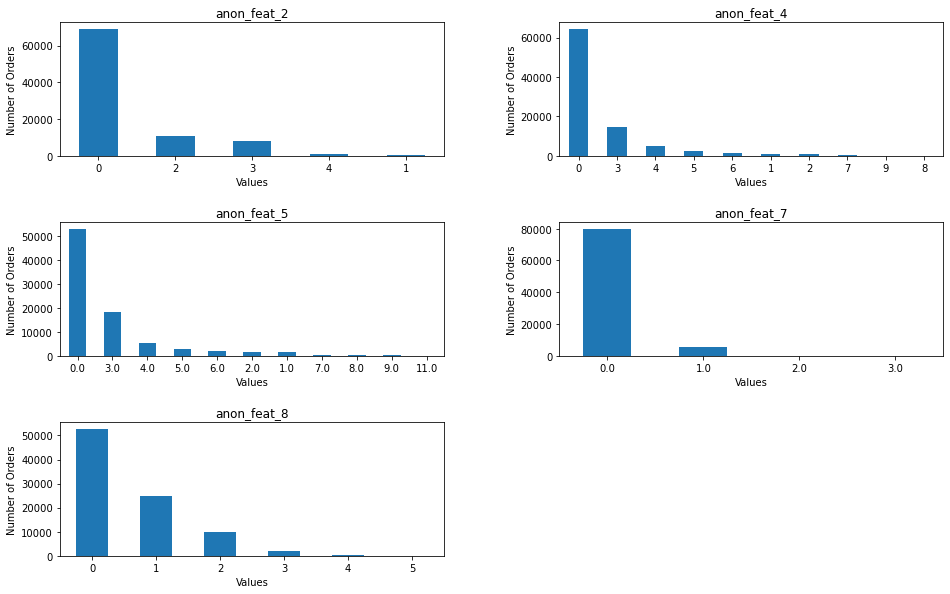

In [67]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.3)

df2_count = df['anon_feat_2'].value_counts()
df2_count.plot.bar(figsize=(10, 5), rot = 0, ax=axes[0,0], subplots=True)
plt.title("anon_feat_2 distribution")
axes[0,0].set_xlabel("Values")
axes[0,0].set_ylabel("Number of Orders")
#plt.show()

df4_count = df['anon_feat_4'].value_counts()
df4_count.plot.bar( rot =0, ax=axes[0,1], subplots=True)
plt.title("anon_feat_4 distribution")
axes[0,1].set_xlabel("Values")
axes[0,1].set_ylabel("Number of Orders")
#plt.show

df5_count = df['anon_feat_5'].value_counts()
df5_count.plot.bar( rot=0, ax=axes[1,0], subplots=True)
plt.title("anon_feat_5 distribution")
axes[1,0].set_xlabel("Values")
axes[1,0].set_ylabel("Number of Orders")
#plt.show()

df7_count = df['anon_feat_7'].value_counts()
df7_count.plot.bar( rot=0, ax=axes[1,1], subplots=True)
plt.title("anon_feat_7 distribution")
axes[1,1].set_xlabel("Values")
axes[1,1].set_ylabel("Number of Orders")

#plt.show()

df8_count = df['anon_feat_8'].value_counts()
df8_count.plot.bar( rot = 0, ax=axes[2,0], subplots=True)
plt.title("anon_feat_8 distribution")
axes[2,0].set_xlabel("Values",)
axes[2,0].set_ylabel("Number of Orders")
fig.delaxes(axes[2][1])
plt.savefig("catagorical.png", dpi=600)
plt.show()

We further noted that several categorical features had valued which were very rare. below is an example of one of those features "countries". As can be observed, the number of orders placed unded the country codes "GUY", "BWA" AND "LCA" is extremely insignificant when compared with the number of orders placed under the top country - "PRT". Another exampe is the feature "anon_feat_6" in which almost all orders were given the same value.

Rare values are to be avoided if strings are turned into dummy variables (as we chose to do, see below), as in some cases they can dramatically increase the dimensionality, while providing very little actual useful information. For example in this database, turning the "countries" feature into dummy variables created "_____" new variables, but most of them contained almost no information (as most countries had very few orders). By deleting the rare values we were able to reduce the number of dummy variables created from this feature to only "_____", while losing relatively little information in the process.


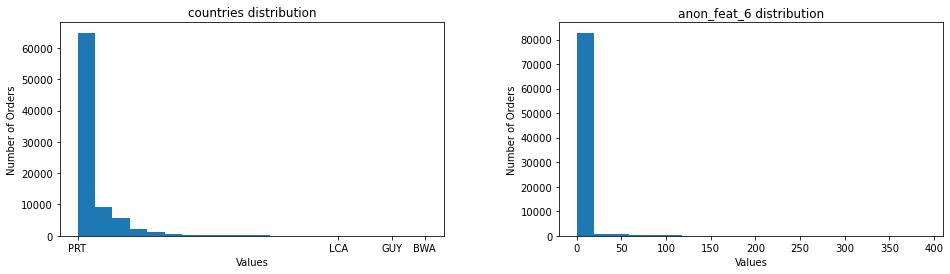

In [68]:
#Features with noted rare values
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.3)

axes[0,0].hist(df['country'][df["country"].notnull()].values, log = False, bins = 20)
axes[0,0].set_title("countries distribution")
axes[0,0].set_xticks(["PRT", "GUY", "BWA", "LCA"])
axes[0,0].set_xlabel("Values")
axes[0,0].set_ylabel("Number of Orders")

axes[0,1].hist(df['anon_feat_6'][df["anon_feat_6"].notnull()].values, log = False, bins = 20)
axes[0,1].set_title("anon_feat_6 distribution")
axes[0,1].set_xlabel("Values")
axes[0,1].set_ylabel("Number of Orders")

fig.delaxes(axes[1][0])
fig.delaxes(axes[1][1])
plt.savefig("rare.png", dpi=600)
plt.show()

We also noted that many feature had orders with no value attached (null), with some features even missing the majority of their values. Null values have to be assigned a valued in some manner in order to be handled by the models (if the percentage of missing values is too high - it might be best to delete the feature completely).

below is a breakdown of the 5 features with the highest percentage of missing values.

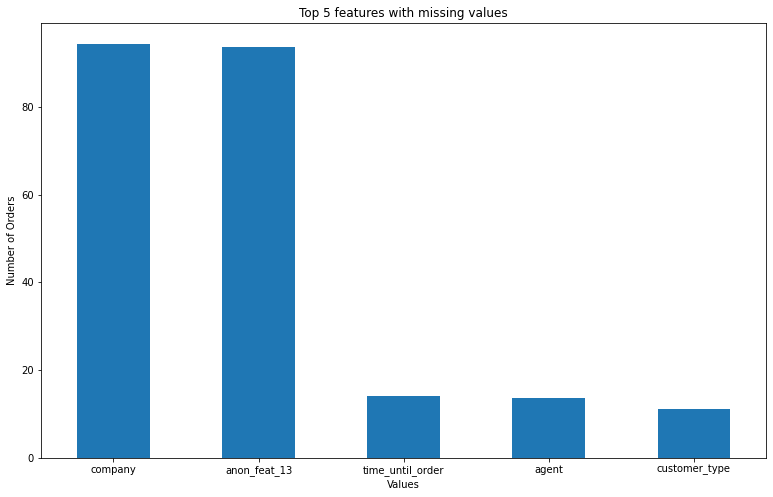

In [69]:
null_count_df = df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100
null_count_df.head().plot.bar(rot=0)
plt.title("Top 5 features with missing values")
plt.xlabel("Values")
plt.ylabel("Number of Orders")
plt.savefig("Null Features.png", dpi=600)
plt.show()

We noted that many of the numaric features had valued had a very different values scale. For example, in the feature "anon_feat_10" all values were between 0 and 1, while the feature "anon_feat_6" had values above 100. Below is an illustration of the distinction between those two features (presnted in logaritmic scale in order for the distinction to be viewble). 

Leaving all numaric values on the same scale is highly problematic, as the distinction between velues of different scales is lost (for example, all the valus in the feature "anon_feat_10" will seem to the model as almost identical, when put on the same scale as the much larger values of "anon_feat_6").This is usually addressed converting all numeric values to the same scale, such as in the StandardScaler (creating a numeric distribution with 0 as the mean and 1 as the variance) and the MinMaxScaler (converting all values to the scale of 0 to 1). We chose to use the StandardScaler method, as it provided better results in our final model.

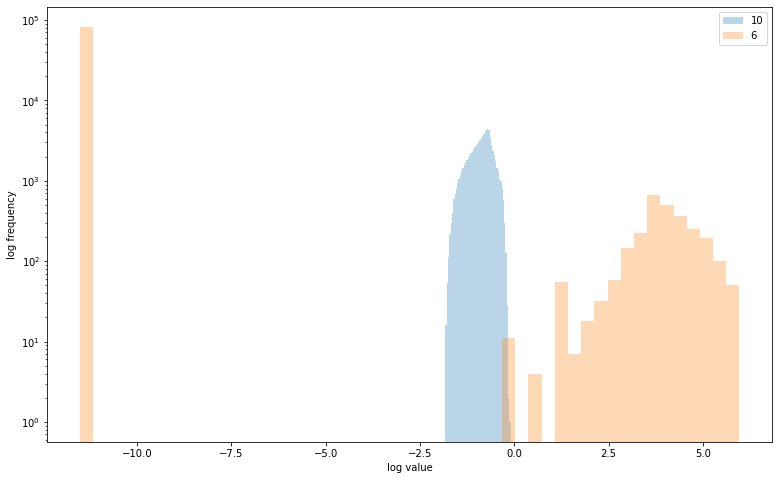

In [70]:
plt.hist(np.log(df['anon_feat_10'][df["anon_feat_10"].notnull()].values + 1e-5), log = True, label = "10", alpha  = 0.3, bins = 50)
plt.hist(np.log(df['anon_feat_6'][df["anon_feat_6"].notnull()].values + 1e-5), log = True, label = "6", alpha = 0.3, bins =50)
plt.legend()
plt.xlabel("log value")
plt.ylabel("log frequency")
plt.savefig("uneven distribution.png", dpi=600)
plt.show()

we noticed that while only one feature was explicitly defined as boolean, several other features, which were not defined as boolean, but rather as string or int, were in fact boolean in nature (i.e. only had two possible values). We assumed that exact value of these features (0 or 1 etc) is only intended to denote the differnce and bears no other importance. We therefore decided to turn these features into dummy variables to indicate True or false (see below).

Below is a breakdown of the boolean like feature in the data set.

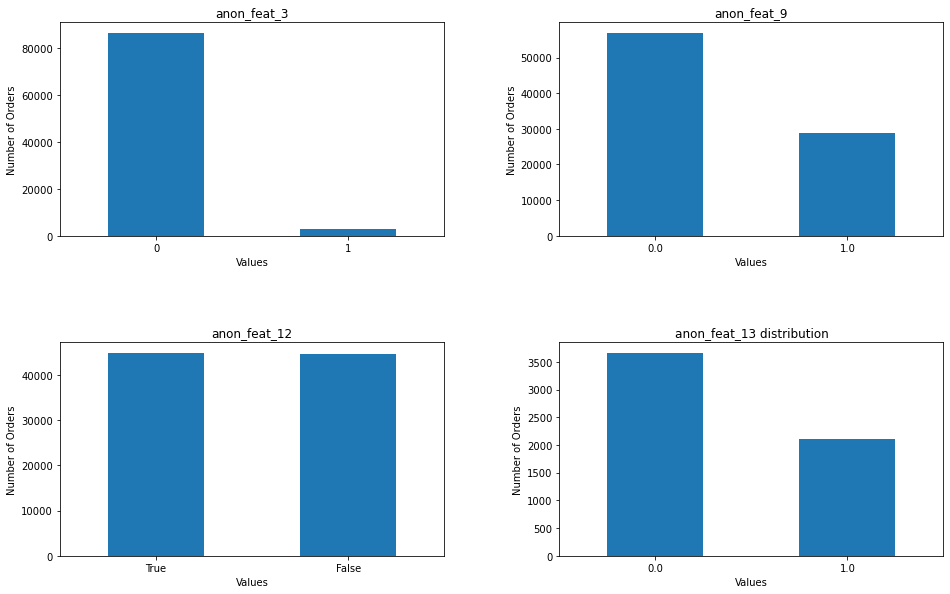

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.3)

df3_count = df['anon_feat_3'].value_counts()
df3_count.plot.bar(figsize=(10, 5), rot = 0, ax=axes[0,0], subplots=True)
plt.title("anon_feat_3 distribution")
axes[0,0].set_xlabel("Values")
axes[0,0].set_ylabel("Number of Orders")

df9_count = df['anon_feat_9'].value_counts()
df9_count.plot.bar(figsize=(10, 5), rot = 0, ax=axes[0,1], subplots=True)
plt.title("anon_feat_9 distribution")
axes[0,1].set_xlabel("Values")
axes[0,1].set_ylabel("Number of Orders")

df12_count = df['anon_feat_12'].value_counts()
df12_count.plot.bar(figsize=(10, 5), rot = 0, ax=axes[1,0], subplots=True)
plt.title("anon_feat_12 distribution")
axes[1,0].set_xlabel("Values")
axes[1,0].set_ylabel("Number of Orders")

df13_count = df['anon_feat_13'].value_counts()
df13_count.plot.bar(figsize=(10, 5), rot = 0, ax=axes[1,1], subplots=True)
plt.title("anon_feat_13 distribution")
axes[1,1].set_xlabel("Values")
axes[1,1].set_ylabel("Number of Orders")

plt.savefig("boolean.png", dpi=600)
plt.show()

## Preprocessing

Below is the preprocessing of the data. We began by creating various auxiliary to process the data, based on the principles detailed above

In [72]:
def is_converted_to_1hot(column_name) -> bool: 
    """
    a function to determine whether or not to handle specific string columns, as we initially thought to handle only
    some.in the final version all string columns are handled, so this function currently always returns True.
    """
    return True 
         
def drop_column(column_name) -> bool: 
    """
    We used this fucntion to delete certain features - such as features that bears strong correlation to
    each other and are probably redundant (see heat map above), i.e. the correlated features filter method. 
    
    Of the features that have strong correation to each other - only the deletion of "anon_feat_4" yielded an 
    increase in performance. We also thought that deletion of "order_day_of_month" might be beneficial
    (probably due to the fact that whatever useful information therein was already included in "order month", but
    this did not lead to any improvements). 
    
    we initially thought to further perform feature selection by using the low variation (sparse) filtee method on
    features which displayed such behaviour (such as anon_feat_3 or anon_feat_6) but it did not improve the results
    of the final model we selected, so in the final version below they were not dropped
    """
    if column_name == "anon_feat_4":
       return True
    else:
        return False
  
    
def turn_into_boolean(x_train) -> np.ndarray:
    """
    as we decided to turn boolean like features into dummy variables, this function takes care of the first step -
    turning them into strings
    """
    boolean_columns = [name for name in x_train if len(x_train[name].value_counts().values) == 2]
    #saving the name of boolean columns
    column_values = {name : x_train[name].value_counts().index.tolist() for name in x_train[boolean_columns]}
    #dictionary to map each boolean column name with its values names
    
    for column_name in x_train[boolean_columns]:
        #turning the columns we found into boolean  
        column_vals2booleans = {column_values[column_name][0]: "1", column_values[column_name][1] :"0"}
        x_train[column_name] = x_train[column_name].replace(column_vals2booleans)
        
        x_train[column_name][x_train[column_name].isnull()] = np.nan
    return x_train


def turn_into_int(x_train) -> np.ndarray:
    """
    this function converts float features which are int like into int (which will later be processed as string, if 
    displays catagorical behaviour). The special type int64 was used in order to be able to include nan values 
    (which are handled in a separate function)
    """
    #we seleceted 10 as the maximum number of possible values in a feature we will handle as int like
    int_like_columns = [name for name in x_train if ((len(x_train[name].value_counts().values) <=10) and x_train[name].dtype == float)]
    print("int like columns", int_like_columns)
    #saving the name of int like columns
    #column_values = {name : x_train[name].value_counts().index.tolist() for name in x_train[int_like_columns]}
    #dictionary to map each int_like column name with its values names
    
    for i, column_name in enumerate(x_train[int_like_columns]):
        #turning the columns we found into int  
        #column_vals2int = {column_values[column_name][i]: "1"}
        col = x_train[column_name]
        #only handle if all values are integer
        is_integer_like = np.allclose(col[~col.isnull()].astype(int), col[~col.isnull()])  
        if is_integer_like:
            x_train[column_name] = x_train[column_name].astype(pd.Int64Dtype())
    
    return x_train


def handle_str_nan(column, strategy="void"): 
    #function to handle string columns with nan values
    """
    strategy: dictating how to handle the nan elements in string features.
    options:
        void (default option): replace with empty space
    """
    if strategy == "void":                  
        column = column.replace(np.nan, "")
        column = column.replace(pd._libs.missing.NAType(), "") 
        return column

def handle_int_nan(column, strategy="void"):
    #function to handle string columns with nan values
    """
    strategy: dictating how to handle the nan elements in string features.
    options:
        void (default option): replace with empty space
    """
    raise NotImplementedError
    
def handle_float_nan(column, strategy="zero"): 
#function to handle float columns with nan values
    """
    strategy: dictating how to handle the nan elements in float features.
    options:
        mean (default option): repalce with mean
        zero: replace with zero
        median: replace with median
        mode: replace with most common value
    """
    non_nn = column[~column.isnull().values] 
    non_nn = non_nn[~(non_nn==pd._libs.missing.NAType()).values] # & column[~column.isnull().values] 
    if strategy == "zero":
        print("here", column.name)
        column = column.replace(np.nan, 0.0)
        column = column.replace(pd._libs.missing.NAType(), 0.0) 
    elif strategy == "mean":
        column = column.replace(np.nan, np.mean(non_nn)) 
    elif strategy == "median":
        column = column.replace(np.nan, np.median(non_nn))
    elif strategy == "mode":
        column = column.replace(np.nan, np.mode(non_nn)) 
    return column

def handle_string_column(column, str_encoder, nan_handler_fn) -> np.ndarray:
    """
    general function to handle string columns. receives the column, str_encoder (instnace of the class
    OneHotEncoder that receives an array (a column which was transformed with a different fucntions) and turns
    it into dummy variables, and a function to handle nan written above (for string or other objects)).
    """
    column = nan_handler_fn(column) # remove nan by calling the nan_handler function
    column = np.array(column) # convert pandas Seires object to np array
    column = np.expand_dims(column, 1) # add a dummy dimension since the str_enc expects a 2d input
    str_encoder.fit(column) 
    # use the str_enc to map the strings to some other representation dummy variables or otherwise)
    column_transformed = str_encoder.transform(column)   # apply the mapping to the strings
    return column_transformed # return

def handle_float_column(column, float_encoder, nan_handler_fn) -> np.ndarray:
    """
    general function to handle float columns, receives a column, float encoder
    and a function to handle nan written above 
    """
    column = nan_handler_fn(column) # remove nan by calling the nan_handler function
    column = np.array(column) # convert pandas Seires object to np array
    column = np.expand_dims(column, 1) # add a dummy dimension since the float_enc expects a 2d input
    float_encoder.fit(column) # use the float_enc to handle the float values
    column_transformed = float_encoder.transform(column)   # apply the mapping to the floats
    return column_transformed # return
          
def remove_rare_values(column, threshold, replace_with = np.nan):
    """ 
    This function is designed to remove rare values from string columns (by turning them into nan, to be handled 
    separately by the nan handler function. 
   
    """      
    # collect stats for the number of occurrences of each value
    counts = Counter(column.values.tolist()) 
 
    # a dictionary-like mapping between keys (such as "countries") and values; counter is a built-in function
    key2freq = {key:val/np.sum(list(counts.values())) for key,val in counts.items()} 
    #creates a second dictionary, this time with frequencies
    
    mean_freq = np.mean(list(key2freq.values())) #mean of all the frequencies
    keys_to_remove = set() #creates an empty set 
    
    for key, freq in key2freq.items(): #adds all rare values to the new set
        
        if freq < mean_freq / threshold:
            
            keys_to_remove.add(key)
    
    column_without_rare_values = [c if c not in keys_to_remove else replace_with for c in column.values] 
    # list comprehension
    return column_without_rare_values

def run_pca(X: np.ndarray, dims: int) ->  np.ndarray:
    #function to perform pca
    pca = PCA(n_components=dims)
    pca.fit(X)
    return pca
    

Originally we planned to create some new features, in order to extract the most useful information from an existing 
feature, while reducing its dimensions.

we had several ideas such as divinding the orders winter orders and summer
orders (as this might be the most important information concerning the order_month), dividing the orders to those
with more than 2 adults (which are probably different in nature than those with only 2) and dividing the orders
to those with no children (the overwhelming majority) and those with 1 more or more (as the exact number is probably 
not that important).

we also noticed that several of the anonymous features (such as anon_feat_2, anon_feat_4, anon_feat_6, anon_feat_7 andanon_feat_8) had an unbalanced split with almost all orders under the same values, and though to split those orders into 2: unique (all orders with the uncharacteristic value) and regular (the majority).

however, none of these attampts resulted in an improved performance in out selected model (RandomForestClassifier),
so this area is unactivated in the final draft of the project

In [73]:
#summer_col_vals = []
#for val in df["order_month"].values:
 #   if val == "June" or val == "July":
 #       summer_col_vals.append("Summer")
 #   elif val != np.nan:
  #      summer_col_vals.append("Winter")
  #  else:
  #      summer_col_vals.append(np.nan)

#df["summer"] = summer_col_vals

#large_party_col_vals = []
#for val in df["adults"].values:
 #   if val >= 3:
   #     large_party_col_vals.append("1")
 #   elif val < 5:
  #      large_party_col_vals.append("0")
  #  else:
      #  large_party_col_vals.append(np.nan)

#df["large party"] = large_party_col_vals

#children_col_vals = []
#for val in df["children"].values:
  #  if val > 0:
     #   children_col_vals.append("1")
  #  elif val < 5:
    #    children_col_vals.append("0")
   # else:
     #   children_col_vals.append(np.nan)

#df["children"] = children_col_vals

#new_4_col_vals = []
#for val in df["anon_feat_4"].values:
  #  if val == 0:
    #   new_4_col_vals.append("1")
   # elif val != 0:
      #  new_4_col_vals.append("0")
   # else:
      #  new_4_col_vals.append(np.nan)

#df["new_4"] = new_4_col_vals

Below is the main preprocessing function, which applies all of the aforementioned auxiliary functions 

In [74]:
#main pre-processing function    
def preprocess(x_train):

    name2feat = {} # init a dictionary that would store a mapping between column names (features) and their values
    str_enc = OneHotEncoder(handle_unknown='ignore', sparse = False) # categorical variable --> 1 hot
    float_enc = StandardScaler()   
    #processing on entire columns
    to_keep = [name for name in x_train if not drop_column(name)] 
    x_train = x_train[to_keep] #call to function to decide which features to drop
    x_train = turn_into_boolean(x_train)
    x_train = turn_into_int(x_train)
    
    for column_name in x_train: # for each feature name
        column = x_train[column_name] # get the values of this feature
        dtype = column.dtype # dtype
        #drop_outliers[column_name]: #call to function to drop outliers'
        print(column_name, dtype)
        #if column_name == "children":
        #    print ("fdsfsd", dtype, type(dtype))
        if dtype == "object": #if the column is string
        
            x_train[column_name] = remove_rare_values(column, threshold = 3, replace_with = np.nan)
            #if column_name == "anon_feat_9":
            
            if is_converted_to_1hot(column_name): 
            #call to function to decide which features to turn into dummy variables   
                name2feat[column_name] = handle_string_column(column, str_enc, handle_str_nan)
        elif str(dtype) == "float64":       
            name2feat[column_name] = handle_float_column(column, float_enc, handle_float_nan)
        elif str(dtype) == "int64" or str(dtype) == 'Int64':
            num_unique_vals = len(column.value_counts())
            if num_unique_vals <= 10:
                name2feat[column_name] = handle_string_column(column.astype("str"), str_enc, handle_str_nan) #handle_float_column(column, float_enc, handle_float_nan)
            else:
                name2feat[column_name] = handle_float_column(column.astype("float"), float_enc, handle_float_nan)
            #in case we want to use on int features the same standerization for int 
    return name2feat

name2feat = preprocess(df_combine)

<ipython-input-72-cf43f8530b27>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column_name] = x_train[column_name].replace(column_vals2booleans)
<ipython-input-72-cf43f8530b27>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column_name][x_train[column_name].isnull()] = np.nan
C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

int like columns ['children', 'anon_feat_7']
time_until_order float64
here time_until_order
order_year int64
order_month object
order_week object


<ipython-input-72-cf43f8530b27>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column_name] = x_train[column_name].astype(pd.Int64Dtype())
<ipython-input-74-d823bd88bbe4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column_name] = remove_rare_values(column, threshold = 3, replace_with = np.nan)
<ipython-input-74-d823bd88bbe4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

order_day_of_month int64
here order_day_of_month
adults int64
here adults
children Int64
babies int64
country object
order_type object
acquisition_channel object
prev_canceled int64
here prev_canceled
prev_not_canceled int64
here prev_not_canceled
changes float64
here changes
deposit_type object


<ipython-input-74-d823bd88bbe4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column_name] = remove_rare_values(column, threshold = 3, replace_with = np.nan)
<ipython-input-74-d823bd88bbe4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column_name] = remove_rare_values(column, threshold = 3, replace_with = np.nan)
<ipython-input-74-d823bd88bbe4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

agent float64
here agent
company float64
here company
customer_type object
adr float64
here adr
anon_feat_0 float64
here anon_feat_0
anon_feat_1 int64
here anon_feat_1
anon_feat_2 int64
anon_feat_3 object


<ipython-input-74-d823bd88bbe4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column_name] = remove_rare_values(column, threshold = 3, replace_with = np.nan)
<ipython-input-74-d823bd88bbe4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column_name] = remove_rare_values(column, threshold = 3, replace_with = np.nan)


anon_feat_5 float64
here anon_feat_5
anon_feat_6 float64
here anon_feat_6
anon_feat_7 Int64
anon_feat_8 int64
anon_feat_9 object
anon_feat_10 float64
here anon_feat_10
anon_feat_11 float64
here anon_feat_11
anon_feat_12 object
anon_feat_13 object


<ipython-input-74-d823bd88bbe4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column_name] = remove_rare_values(column, threshold = 3, replace_with = np.nan)
<ipython-input-74-d823bd88bbe4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column_name] = remove_rare_values(column, threshold = 3, replace_with = np.nan)
<ipython-input-74-d823bd88bbe4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Below it the  function to handle outliers. In our preprocessing we choce to deleate values which are more than 3 standard deviations removed from the mean, but only if they consist less than 1% of all samples (as outlers are suppose to be rare, otherwise they might result from the distribution of values in the feature, and not trully be outliers).

If that condition is not met, we deleted only samples which are more than 3 standard deviations removed from the mean (again, only if they consist less than 1% of all samples).

We thought that this method of processing will provide a good balance between the need to remove outliers, and the need to preserve samples which are trully outliers, but rather a characteristic of features which are not evenly distributed. 


In [75]:
name2feat_train = {k: v[:len_data] for k, v in name2feat.items()}
name2feat_test = {k: v[len_data:] for k, v in name2feat.items()}

In [76]:
def remove_outliters(name2feat_train, y, num_examples):
      
     def get_outliers(val, how_many_stds):
        
        mean = np.mean(val, axis = 0)
        std = np.std(val, axis = 0)
        is_potential_outlier = (val > (mean + how_many_stds*std)) | (val < (mean - how_many_stds*std))
        prop_outliers =  is_potential_outlier.sum()/len(val)
        return is_potential_outlier, prop_outliers
        
     name2feat_clean = dict()
     bad_idx_set = set()
     num_examples = name2feat_train["children"].shape[0]
    
     for key,val in name2feat_train.items():
            if val.shape[1] == 1: #this will be true only for float

                is_potential_outlier, prop_outliers = get_outliers(val, 3)
                if prop_outliers <= 0.01:
                    for j, isoutlier in enumerate(is_potential_outlier):
                        if isoutlier == True:
                            bad_idx_set.add(j)
                            
                else:
                    is_potential_outlier, prop_outliers = get_outliers(val, 4)
                    if prop_outliers <= 0.01:
                        for j, isoutlier in enumerate(is_potential_outlier):
                            if isoutlier == True:
                                bad_idx_set.add(j)                    
     to_keep = np.array([True if i not in bad_idx_set else False for i in range(num_examples)])
     for key,val in name2feat_train.items():
        
        name2feat_clean[key] = val[to_keep]
            
     return name2feat_clean, y[to_keep]

y = dfy.to_numpy().astype(int)
name2feat_train, y = remove_outliters(name2feat_train, y, len(df))

Below is the original version of the function to handle outliers - included as one of the auxiliary functions (prior to the main preprocessing function). We actully got better performance by using it after preprocessing was complete, so this version was not used.

In [77]:
 #def remove_outliters(df, y, num_examples):
   
   #  def get_outliers(column, how_many_stds):
        
      #  column_not_null = column[~column.isnull()]
        
      #  mean = np.mean(column_not_null, axis = 0)
      #  std = np.std(column_not_null, axis = 0)
      #  is_potential_outlier = (column > (mean + how_many_stds*std)) | (column < (mean - how_many_stds*std))
      #  prop_outliers =  is_potential_outlier.sum()/len(column)
      #  return is_potential_outlier, prop_outliers 
        
    # name2feat_clean = dict()
   #  bad_idx_set = set()
   #  float_column_names = []
    
   #  for key,val in df.items():
       #     if str(val.dtype) == "float64": 
          #      float_column_names.append(val.name)
                
             #   is_potential_outlier, prop_outliers = get_outliers(val, 3)
            #    if prop_outliers <= 0.01:
                #    for j, isoutlier in enumerate(is_potential_outlier):
                  #      if isoutlier == True:
                     #       bad_idx_set.add(j)
                            
             #   else:
                #    is_potential_outlier, prop_outliers = get_outliers(val, 4)
                #    if prop_outliers <= 0.01:
                   #     for j, isoutlier in enumerate(is_potential_outlier):
                      #      if isoutlier == True:
                        #        bad_idx_set.add(j)                    
    # to_keep = np.array([True if i not in bad_idx_set else False for i in range(num_examples)])
        
   #  for column_name in df.columns:
        
     #   name2feat_clean[column_name] = df[column_name][to_keep]
            
   #  df_clean = pd.DataFrame(name2feat_clean)

   #  return df_clean, y[to_keep]


Creating a data set to combine all features into a single array

In [78]:
def create_dataset(data_dict):
    name2idx = {} 
    idx2name = {}
    
    feature_vals = []
    j = 0
    
    for key,val in data_dict.items():
        feature_vals.append(val) #adding values to the new array
        name2idx[key] = (j,j + val.shape[1])  #saving a mapping between the features and their location in the new array
        for k in range(j, j + val.shape[1]):
            idx2name[k] = key
            
        j += val.shape[1] #saving the number of the features of the current feature
        
    X = np.concatenate(feature_vals, axis = 1) 
    return X, name2idx, idx2name #returning new array, and two mapping dictionaries later used in feature importance

def to_one_hot(one_d_array): #turning the lables into "one_hot" readable by the model
    
    onehot = OneHotEncoder()
    y_val_dummy = np.expand_dims(one_d_array, 1)
    onehot.fit(y_val_dummy)
    column_transformed = onehot.transform(y_val_dummy)
    return column_transformed.toarray()

X, name2idx, idx2name = create_dataset(name2feat_train)

splitting the data set to train (75% of data) and validation (25% of data), done at random

In [79]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.25,random_state = 42,shuffle = True)

Prior to the final calssification, we tried running the tsne function to see if  the features we intuitively  identified in the exploration stage as features with no distinct correlation to the label are indeed not separable (as the function provides a 2D projection of the data while trying to preserve existing distances, if the features are separable we would expect to see distinct clusters of different color being formed).

as is evident below, when processed together these feature are not separable 

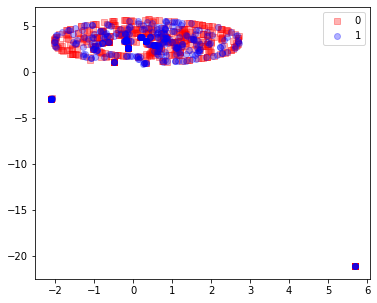

In [80]:
from sklearn.manifold import TSNE

def tsne(vecs, labels):

  tsne = TSNE(n_components=2)#, angle = 0.5, perplexity = 20)
  vecs_2d = tsne.fit_transform(vecs)
  label_names = sorted(list(set(labels.tolist())))
  num_labels = len(label_names)

  names = sorted(set(labels.tolist()))

  plt.figure(figsize=(6, 5))
  colors = "red", "blue"
  for i, c, label in zip(sorted(set(labels.tolist())), colors, names):
     plt.scatter(vecs_2d[labels == i, 0], vecs_2d[labels == i, 1], c=c,
                label=label, alpha = 0.3, marker = "s" if i==0 else "o")
     plt.legend(loc = "upper right")

  plt.show()

n=1000
features_to_use = ["anon_feat_3", "anon_feat_6"]
#features_to_use = ["deposit_type", "country", "anon_feat_9", "order_year"]
featues = np.concatenate([name2feat_train[name][:n] for name in features_to_use], axis = 1)
tsne(featues[:n], y[:n])


on the contrary, running the function again with two other features ("anon_feat_13" and "country") provided a much better separation

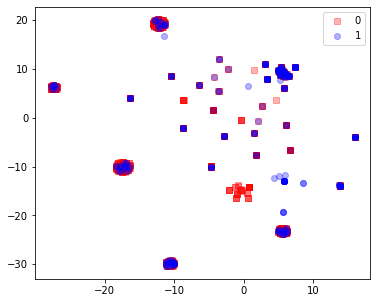

In [81]:
features_to_use = ["anon_feat_13","country"]
featues = np.concatenate([name2feat_train[name][:n] for name in features_to_use], axis = 1)
tsne(featues[:n], y[:n])

## Classification 

Below are the four model used - logistic regression, K Neighbors, Decision Tree, and the model that provided the best results and was chosen by us as the final model to provide the predictions - Random Forest.

Parameters to be used by each model were chosen by the performance of grid serach (deactivated in the final version in order to prevent prolonged running time).

PCA was also attempted but did not result in any meaningful improvement and therefore was not used in the final model. A usage example is included however in the section dedicated to the first model. 

Sidenote: we actully got better performace by keeping the feature "Unnamed_0" (even though it is supposably just an order ID with no usefull information). However to be on the safe side, this feature was dropped prior to preprocessing.  

In [82]:
#calling the pca function and applying it to the train and val data sets
pca = run_pca(x_train, dims = 64)
x_train_transformed = pca.transform(x_train)
x_val_transformed = pca.transform(x_val)


The first model we tested was logistic regression

In [83]:
clf1 = SGDClassifier(loss = "log", random_state = 0, penalty = "l1", alpha = 0.0002, shuffle = True, 
                     fit_intercept = True, learning_rate = "optimal", class_weight = "balanced",
                     warm_start = False)

clf1.fit(x_train, y_train)
val_probs_preds = clf1.predict_proba(x_val)
y_val_one_hot = to_one_hot(y_val)
auc1 = sklearn.metrics.roc_auc_score(y_val_one_hot, val_probs_preds)
print("Val ACU:", auc1)


train_probs_preds = clf1.predict_proba(x_train)
y_train_one_hot = to_one_hot(y_train)
auc1train = sklearn.metrics.roc_auc_score(y_train_one_hot, train_probs_preds)
print("Train ACU:", auc1train)


#print("with parameters...") 
#parameters = {'loss': ["log"], 'penalty': ["l1", "l2"], 'alpha': [0.0001, 0.00001, 0.001, 0.0002],
 #             'shuffle': [True, False], 'fit_intercept': [True, False], 'epsilon': [0.1, 0.01, 0.2], 
  #            'learning_rate': ["optimal"], 'class_weight': ["balanced", None], 'warm_start': [False, True]}

#grid_search = GridSearchCV(clf1, parameters, scoring = "roc_auc", n_jobs=4)
#grid_search.fit(x_train, y_train)
#best = grid_search.best_score_
#best_params = grid_search.best_params_
#print(best_params)
#print(best)


print("With PCA:")

clf1.fit(x_train_transformed, y_train)
val_probs_preds = clf1.predict_proba(x_val_transformed)
y_val_one_hot = to_one_hot(y_val)
auc1pca = sklearn.metrics.roc_auc_score(y_val_one_hot, val_probs_preds)
print("Val ACU:", auc1pca)


train_probs_preds = clf1.predict_proba(x_train_transformed)
y_train_one_hot = to_one_hot(y_train)
auc1pca_train = sklearn.metrics.roc_auc_score(y_train_one_hot, train_probs_preds)
print("Train ACU:", auc1pca_train)

Val ACU: 0.9035610699934747
Train ACU: 0.9043699011323935
With PCA:
Val ACU: 0.9000749312850003
Train ACU: 0.9008687770944965


The secon model tested was K Neighbots.

In order to prevent prolonged running time, evaluation of train AUC was deactivate for this model in the final version (train AUC of 1 was previously observed)

In [84]:
clf2 = KNeighborsClassifier(n_neighbors=15, weights="distance", algorithm = "brute", p = 1,
                            metric = "minkowski", n_jobs = None)

clf2.fit(x_train, y_train)
val_probs_preds = clf2.predict_proba(x_val)
y_val_one_hot = to_one_hot(y_val)
auc2 = sklearn.metrics.roc_auc_score(y_val_one_hot, val_probs_preds)
print("Val ACU:", auc2)

#train_probs_preds = clf2.predict_proba(x_train)
#y_train_one_hot = to_one_hot(y_train)
#auc2train = sklearn.metrics.roc_auc_score(y_train_one_hot, train_probs_preds)
#print("Train ACU:", auc2train)

#print("with parameters...") 
#parameters = {'n_neighbors=15': [5, 10, 15, 20], 'weights': ["distance", "uniform"], 'algorithm': ["auto", "brute"],
#             'p': [1,2],'leaf_size': [10, 20, 30], 'metric': ["precomputed", "minkowski"]}

#grid_search = GridSearchCV(clf2, parameters, scoring = "roc_auc", n_jobs=4)
#grid_search.fit(x_train, y_train)
#best = grid_search.best_score_
#best_params = grid_search.best_params_
#print(best_params)
#print(best)

Val ACU: 0.903390297668984


The third model we used was Decision Tree 

In [85]:
clf3 = DecisionTreeClassifier(class_weight=None, criterion = "entropy", max_depth = None, max_features = "auto", 
                              min_samples_leaf = 4, min_samples_split = 2, min_weight_fraction_leaf = 0.0, 
                              random_state = 0, splitter = "random")

clf3.fit(x_train, y_train)
val_probs_preds = clf3.predict_proba(x_val)
y_val_one_hot = to_one_hot(y_val)
auc3 = sklearn.metrics.roc_auc_score(y_val_one_hot, val_probs_preds)
print("Val ACU:", auc3)

train_probs_preds = clf3.predict_proba(x_train)
y_train_one_hot = to_one_hot(y_train)
auc3train = sklearn.metrics.roc_auc_score(y_train_one_hot, train_probs_preds)
print("Train ACU:", auc3train)


#print("with parameters...") 
#parameters = {'criterion': ["gini", "entropy"], 'splitter': ["best", "random"], 'max_depth': [10, None],
         #    'min_samples_split': [1,2],'min_samples_leaf': [1, 2, 4], 'min_weight_fraction_leaf': [0.0, 0.5],
          #    'max_features': ["auto", "sqrt", "log2"], 'random_state': [0],'class_weight': ['balanced', None]}

#grid_search = GridSearchCV(clf3, parameters, scoring = "roc_auc", n_jobs=4)
#grid_search.fit(x_train, y_train)
#best = grid_search.best_score_
#best_params = grid_search.best_params_
#print(best_params)
#print(best)


Val ACU: 0.8803494303749861
Train ACU: 0.9380094346117767


The fourth model used was Random Forest. This model provided the best results on the validation set, and was used as the final model (despite the observed overfitting).


In [86]:
clf4 = RandomForestClassifier(random_state = 0, bootstrap = False, criterion = "entropy", max_depth = None, max_features = "sqrt",
                            min_samples_leaf = 1,min_samples_split = 2, n_estimators = 500)

clf4.fit(x_train, y_train)
val_probs_preds = clf4.predict_proba(x_val)
y_val_one_hot = to_one_hot(y_val)
auc4 = sklearn.metrics.roc_auc_score(y_val_one_hot, val_probs_preds)
print("Val ACU", auc4)


train_probs_preds = clf4.predict_proba(x_train)
y_train_one_hot = to_one_hot(y_train)
auc4train = sklearn.metrics.roc_auc_score(y_train_one_hot, train_probs_preds)
print("Train ACU", auc4train)


#print("with parameters...") 
#parameters = {'n_estimators': [300, 200], 'criterion': ["gini", "entropy"], 'max_depth': [10, None],
#             'min_samples_split': [2],'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'max_features': 
#            ["auto", "sqrt", "log2"]}
#grid_search = GridSearchCV(clf4, parameters, scoring = "roc_auc", n_jobs=4)
#grid_search.fit(x_train, y_train)
#best = grid_search.best_score_
#best_params = grid_search.best_params_
#print(best_params)
#print(best)


Val ACU 0.9530931939569813
Train ACU 1.0


## Random Forest - Features Importance

Below is a breakdown of the importance granted to the various features by the Random Forest model.
included are the top 5 most important feature and the 5 least important features.

This allows us to gain some insight into the inner working of the model.

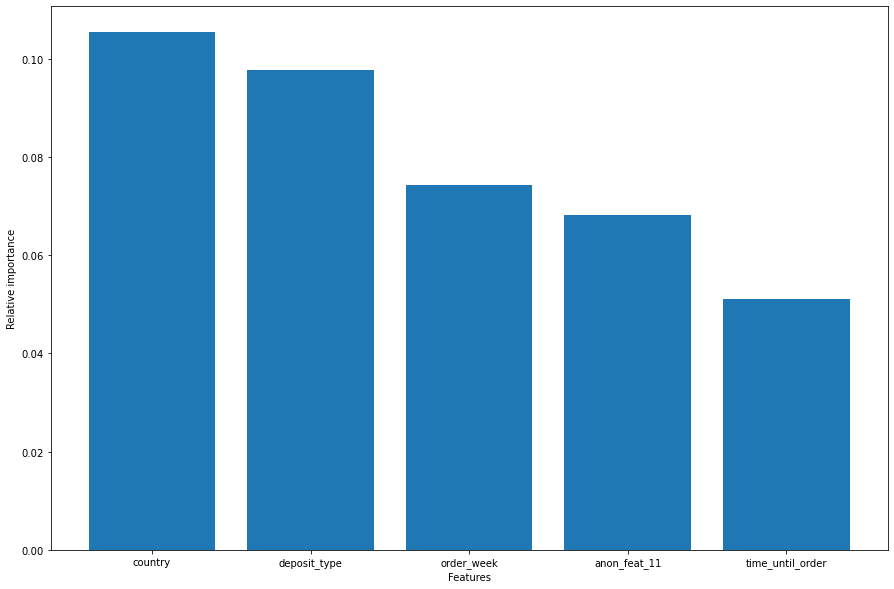

In [87]:
clf4.feature_importances_

features_and_importance = defaultdict(float)
for i, importance in enumerate(clf4.feature_importances_):
    features_and_importance[idx2name[i]] += importance

sorted_items = sorted(features_and_importance.items(), key = lambda pair: -pair[1])
sorted_features, sorted_importance = list(zip(*sorted_items))

f, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.bar(sorted_features[:5], sorted_importance[:5])
plt.xlabel("Features")
plt.ylabel("Relative importance")
plt.savefig("relative importance.png", dpi = 300)
plt.show()

## Ranfom Forest - Confusion Matrix
Included below is a confusion matrix performed on the final model - RandomForest.

The confusion mateix allows us to break down theperformace of the model for each label - canceled (indicated by the
label 1) or not canceled (indicated by the label 0). as is evident from the matrix, the model was able to currently 
predict 88.7% of the orders which were not actually not canceled, and 88% of the orders which were actually 
cenceled. 

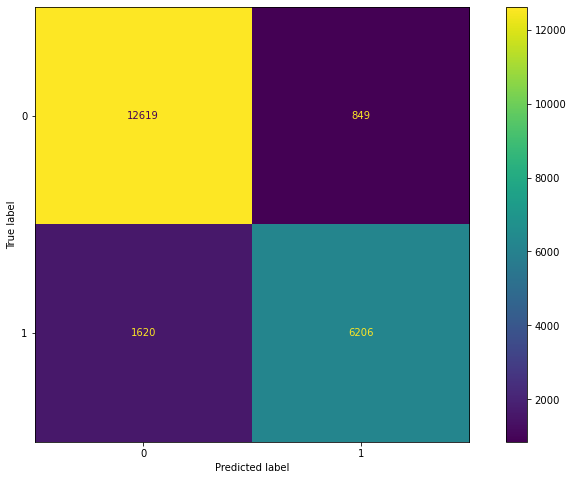

In [88]:

plot_confusion_matrix(clf4, x_val, y_val)
plt.savefig("confusion.png", dpi = 300)
plt.show()  

#metrics.plot_roc_curve(clf, x_val, y_val)  
#plt.show()


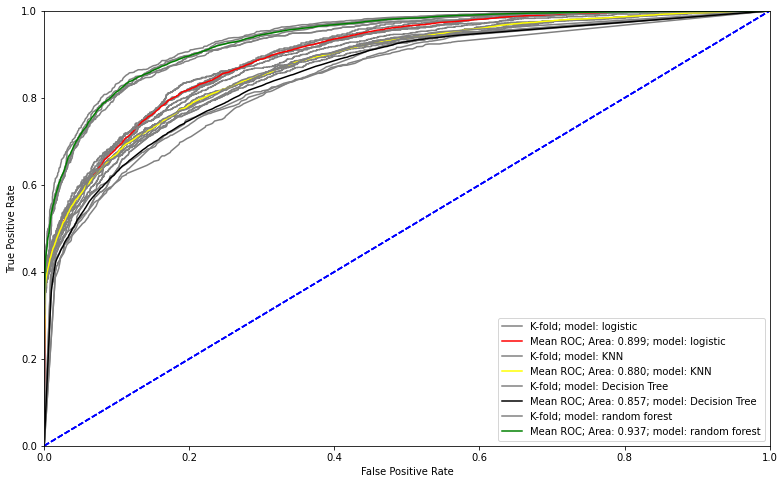

In [89]:
def KfoldPlot(X, y, clf, k, model_name, color):
        
    kfolds = KFold(n_splits = k, shuffle = True)
    i = 0
    
    tpr_and_fpr = []
    
    stepsize = 0.001
    interp_vals = np.arange(0,1,stepsize)
    tpr_mean = np.zeros(int(1./stepsize))
    
    for train_index, test_index in kfolds.split(X):
                
        i += 1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        probs = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
        tpr_interp = interp(interp_vals, fpr, tpr)
        tpr_mean += tpr_interp
        
        tpr_and_fpr.append((tpr, fpr))
        plt.plot(fpr, tpr, color = "grey")
        
    # dummy re-plot to create labels
    
    plt.plot(fpr, tpr, color = "grey", label = "K-fold; model: {}".format(model_name))
    
    # plot dashed line
    
    plt.plot(interp_vals, interp_vals, linestyle = "--", color = "blue")
    
    # plot auc
    
    tpr_mean /= k
    auc_val = auc(interp_vals, tpr_mean)
    
    plt.plot(interp_vals, tpr_mean, color = color, label = "Mean ROC; Area: {:.3f}; model: {}".format(auc_val, model_name))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    #plt.title("KNeighborsClassifier")
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.legend()
    #plt.show()

KfoldPlot(x_val, y_val, clf1, k=5, model_name = "logistic", color = "red")
KfoldPlot(x_val, y_val, clf2, k=5, model_name = "KNN", color = "yellow")
KfoldPlot(x_val, y_val, clf3, k=5, model_name = "Decision Tree", color = "black")
KfoldPlot(x_val, y_val, clf4, k=5, model_name = "random forest", color = "green")
plt.savefig("Roc.png", dpi = 300)
plt.show()

## Eval on Test

Below if the creation of the final prediction - using the Random Forset model to create a prediction (likelihood to 
be canceled) for each of the orders included in the test set, and generating a new cvs file containing said
predictions.

In [90]:
df_test = pd.read_csv("feature_data_test.csv")

X_test, name2idx, idx2name = create_dataset(name2feat_test)
probs = clf4.predict_proba(X_test)
probs_1 = probs[:,1]
pseudo_ids = df_test["Unnamed: 0"].values

with open("Submission_11.csv", "w") as f:
    f.write(",cancel_proba\n")
    for id, prob in zip(pseudo_ids, probs_1):
        f.write("{},{}\n".format(id, prob))